In [2]:
import scanpy as sc
import numpy as np

In [3]:
adata = sc.read("pancreas_normalized.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 15681 × 1000
    obs: 'batch', 'study', 'cell_type', 'size_factors'

In [5]:
adata.obs["study"].value_counts()

Pancreas inDrop         8391
Pancreas SS2            2961
Pancreas CelSeq2        2426
Pancreas CelSeq         1271
Pancreas Fluidigm C1     632
Name: study, dtype: int64

In [7]:
adata.obs["cell_type"].value_counts()

Pancreas Beta           5085
Pancreas Alpha          4704
Pancreas Ductal         2104
Pancreas Delta          1041
Pancreas Endothelial     836
Pancreas Acinar          713
Pancreas Gamma           637
Pancreas Stellate        561
Name: cell_type, dtype: int64

In [8]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/Users/mohammad.lotfollahi/opt/miniconda3/envs/pytorch/lib/python3.8/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets
/Users/mohammad.lotfollahi/opt/miniconda3/envs/pytorch/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


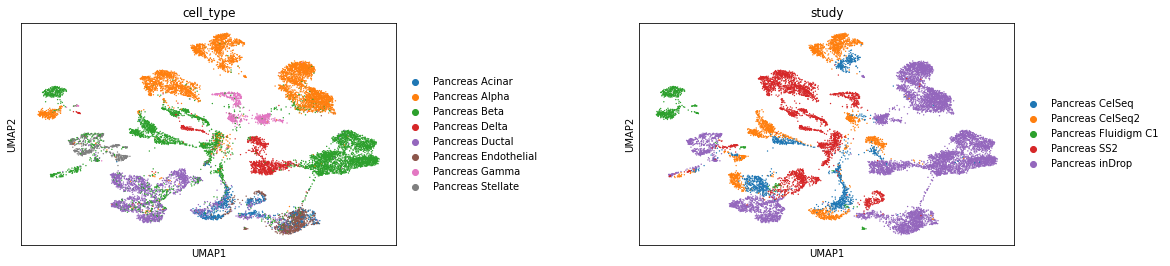

In [11]:
sc.pl.umap(adata, color=["cell_type","study"], wspace=0.5)

In [12]:
adata.obs.groupby("cell_type")["study"].value_counts()

cell_type             study               
Pancreas Acinar       Pancreas inDrop          272
                      Pancreas CelSeq2         170
                      Pancreas CelSeq          162
                      Pancreas SS2             103
                      Pancreas Fluidigm C1       6
Pancreas Alpha        Pancreas inDrop         2249
                      Pancreas SS2            1109
                      Pancreas CelSeq2         885
                      Pancreas Fluidigm C1     241
                      Pancreas CelSeq          220
Pancreas Beta         Pancreas inDrop         3048
                      Pancreas SS2             796
                      Pancreas CelSeq2         600
                      Pancreas CelSeq          341
                      Pancreas Fluidigm C1     300
Pancreas Delta        Pancreas inDrop          613
                      Pancreas CelSeq2         199
                      Pancreas SS2             142
                      Pancreas CelSeq  

#### Rare systematic calculation

In [76]:
Delta = adata[adata.obs["cell_type"]== "Pancreas Delta"]
other = adata[adata.obs["cell_type"]!= "Pancreas Delta"]
adata_list = []
adata_dict = {}
frac_list = [5,10,15,22,35]
for fraction in frac_list:
    for study in Delta.obs["study"].unique(): 
        study_temp = Delta[Delta.obs["study"] == study]
        if len(study_temp)< fraction:
            fract = len(study_temp) 
        else:
            fract = fraction
        adata_list.append(sc.pp.subsample(study_temp, n_obs=fract,copy=True))
    adata_Delta_subsample = other.concatenate(*adata_list,batch_key="concat")
    adata_dict[fract] = adata_Delta_subsample
    adata_list = []

In [77]:
for i in adata_dict.keys():
    len_i = len(adata_dict[i][adata_dict[i].obs["cell_type"]== "Pancreas Delta"])
    print(len_i/len(adata_dict[i]))

0.0017047391749062393
0.0034036759700476512
0.0050968399592252805
0.007390331547901552
0.010877643402472806


In [79]:
for i in adata_dict.keys():
    len_i = len(adata_dict[i][adata_dict[i].obs["cell_type"]== "Pancreas Delta"])
    percentage = len_i/len(adata_dict[i])
    adata_dict[i].write(f"./pancrease_rare/pancrease_rare_{percentage:1f}.h5ad")

An example where rare cells are only 1 percent of the data !

In [80]:
adata_10 = sc.read("./pancrease_rare/pancrease_rare_0.010878.h5ad")

In [81]:
adata_10.obs.groupby("cell_type")["study"].value_counts()

cell_type             study               
Pancreas Acinar       Pancreas inDrop          272
                      Pancreas CelSeq2         170
                      Pancreas CelSeq          162
                      Pancreas SS2             103
                      Pancreas Fluidigm C1       6
Pancreas Alpha        Pancreas inDrop         2249
                      Pancreas SS2            1109
                      Pancreas CelSeq2         885
                      Pancreas Fluidigm C1     241
                      Pancreas CelSeq          220
Pancreas Beta         Pancreas inDrop         3048
                      Pancreas SS2             796
                      Pancreas CelSeq2         600
                      Pancreas CelSeq          341
                      Pancreas Fluidigm C1     300
Pancreas Delta        Pancreas CelSeq           35
                      Pancreas CelSeq2          35
                      Pancreas SS2              35
                      Pancreas inDrop  

In [82]:
adata_10.obs["cell_type"].value_counts()

Pancreas Beta           5085
Pancreas Alpha          4704
Pancreas Ductal         2104
Pancreas Endothelial     836
Pancreas Acinar          713
Pancreas Gamma           637
Pancreas Stellate        561
Pancreas Delta           161
Name: cell_type, dtype: int64

In [83]:
sc.pp.neighbors(adata_10)
sc.tl.umap(adata_10)

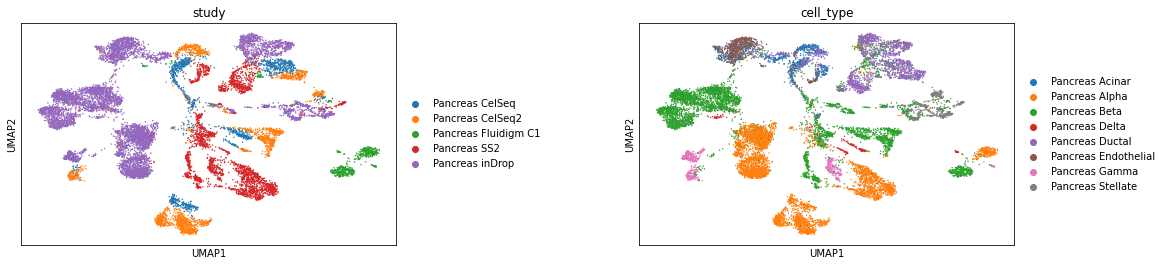

In [84]:
sc.pl.umap(adata_10, color=["study", "cell_type"], wspace=0.5)